# Deep learning Flow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 변하지 않는 Deep learning Flow 
```
data   =>   Preprocess   =>   Model   =>   Evaluation
          - 데이터검증     -  모델링    - 학습과정 추적
          -   전처리       - 학습로직   -    후처리
          - 데이터증강                  -  모델 검증
```

## 1. Data 가져오기

TensorFlow에서 제공하는 MNIST 예제
- datasets는 train/test 두개로 반환한다.

- 데이터 shape, dtype 확인하기

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [3]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


 - 28 x 28 크기의 이미지

In [4]:
print(train_y.shape)
print(test_y.shape)

(60000,)
(10000,)


In [5]:
print(train_x.dtype)
print(test_x.dtype)

print(train_y.dtype)
print(test_y.dtype)

uint8
uint8
uint8
uint8


unsigned 데이터 :  - 128 ~ + 128 ==> 0 ~ 255로 양수만

- 데이터 하나만 뽑기

In [6]:
image = train_x[77]
image.shape

(28, 28)

- 시각화해서 확인

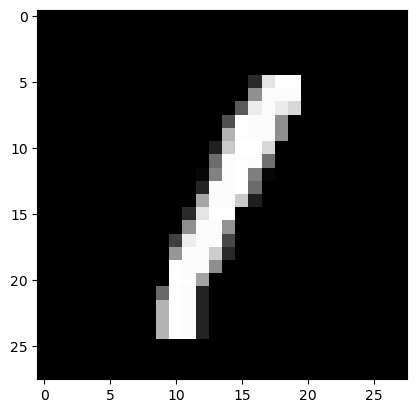

In [7]:
plt.imshow(image, 'gray')
plt.show()

#### 데이터를 받으면 데이터를 이해하기 위해 노력해야합니다! 


#### ex> 훈련용 데이터셋에는 각 숫자의 그림이 몇개씩 들어가 있나? (QUIZ)

----

In [8]:
## 매우 유용함.
## unique의 return_counts하면 유니크 values와 개수들의 두 리스트를 반환함
y_unique, y_counts = np.unique(train_y, return_counts=True)
print(y_unique, y_counts)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


* 시각화를 해야 더 잘 보이겠죠? 

In [9]:
df_view = pd.DataFrame(data={"count" : y_counts}, index=y_unique)
df_view

,count
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851
9,5949


In [10]:
df_view.sort_values("count", ascending=False)

,count
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842
5,5421


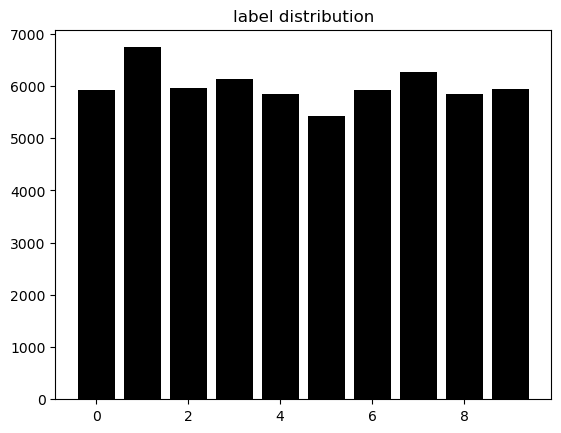

In [11]:
plt.bar(x=y_unique, height=y_counts, color="black")
plt.title("label distribution")
plt.show()

- 데이터 불균형이 심한 경우 따로 작업이 필요하다.

### 막간 퀴즈

다음 코드를 완성하여, 아래 이미지를 시계 반대 방향으로 90도 회전하고 아래위를 반전 시키기

In [12]:
image = tf.constant(image)

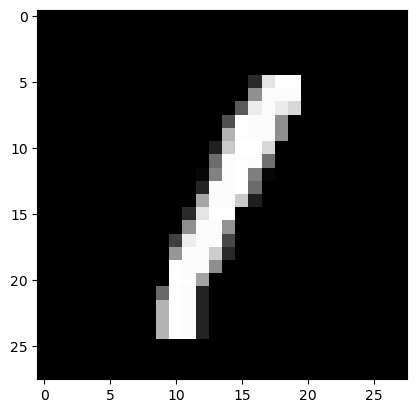

In [13]:
plt.imshow(image, 'gray')
plt.show()

----

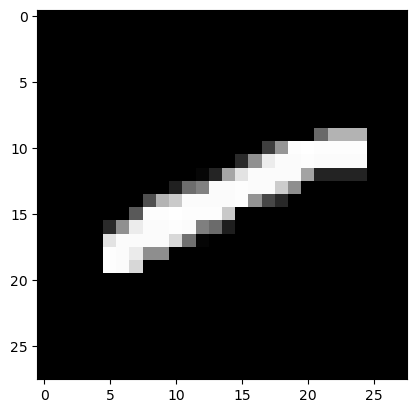

In [14]:
#plt.imshow(?????????(image), 'gray')

plt.imshow(tf.transpose(image), 'gray')
plt.show()

## 2. Preprocessing

- 데이터 검증 
- 전처리 
- 데이터 증강 ... (이 건 추후에!)

#### 데이터 검증 

 - 데이터 중에 학습에 포함 되면 안되는 것이 있는가? ex> 개인정보가 들어있는 데이터, 테스트용 데이터에 들어있는것, 중복되는 데이터
 <br> <br>
 - 학습 의도와 다른 데이터가 있는가? ex> 얼굴을 학습하는데 발 사진이 들어가있진 않은지(가끔은 의도하고 일부러 집어넣는 경우도 있음)
  <br> <br>
 - 라벨이 잘못된 데이터가 있는가? ex> 7인데 1로 라벨링, 고양이 인데 강아지로 라벨링 
  <br> <br>
 -  ... 등
 

보통 데이터 통일을 위해 함수나 클래스로 정의를 한다.

- 모든 데이터가 동일한 전처리 과정을 거칠 수 있도록 해야 추후에 문제가 없고 관리도 편하기 때문에

In [16]:
## 이미지 픽셀 스케일 전처리 함수

def validate_pixel_scale(x):

    return 255 >= x.max() and 0 <= x.min()

In [17]:
## 검증된 트레이닝 데이터 반환
validated_train_x = np.array([x for x in train_x if validate_pixel_scale(x)])

validated_train_y = np.array([y for x, y in zip(train_x, train_y) if validate_pixel_scale(x)])

In [18]:
print(validated_train_x.shape)
print(validated_train_y.shape)

(60000, 28, 28)
(60000,)


#### 전처리 

 - 입력하기 전에 모델링에 적합하게 처리! 
 - 대표적으로 Scaling, Resizing, label encoding 등이 있다. 
 - dtype, shape 항상 체크!!

- 여기까지 
1. 28x28 사이즈의 이미지가 있는 것이고 (픽셀 개수)
2. 하나의 픽셀은 0 ~ 255 사이의 값을 가지고 있는 상태이다

##### Scaling

In [24]:
# 픽셀이 0 ~ 255 값인데 0 ~ 1 사이의 값을 갖도록 (원래 255 범위에 색, 밝기 등이 다 포함된 것)
def scale(x):
    """
    Make pixels within 0 ~ 1
    
    return 
        scaled image (dtype=float32)
    """
    return (x / 255.0).astype(np.float32)


1.0


C:\Users\Sam\miniconda3\envs\gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


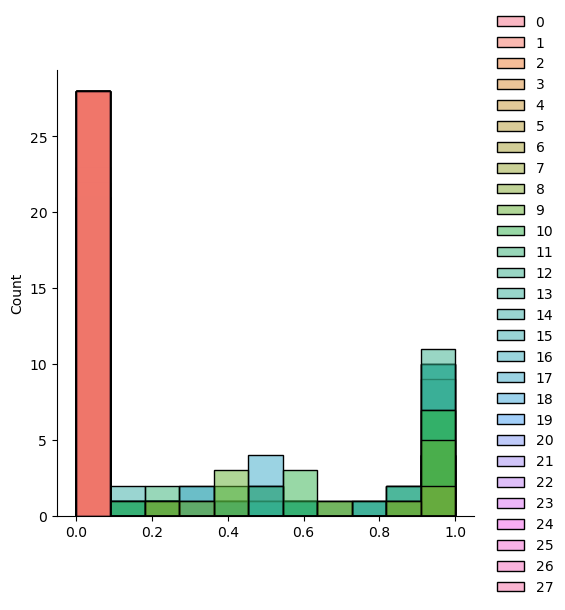

In [34]:
# unit test
sample = scale(validated_train_x[777])
print(sample.max())

#sns.displot(sample.reshape(-1), kde=False)
sns.displot(sample)
plt.show()

In [35]:
sample.shape

(28, 28)

In [36]:
scaled_train_x = np.array([scale(x) for x in validated_train_x])

In [37]:
print(scaled_train_x.shape, scaled_train_x.dtype)

(60000, 28, 28) float32


##### Flattening

 - 이번에 사용할 모델은 기본적인 Feed-Forward Neural Network
 - 1차원 벡터가 Input의 샘플 하나가 된다. (2차원 텐서라는 말)

In [38]:
flattend_train_x = train_x.reshape((60000, -1))

In [39]:
flattend_train_x.shape

(60000, 784)

##### Label encoding

 - One-Hot encoding
 - `tf.keras.utils.to_categorical` 사용! 

In [40]:
validated_train_y[77]

1

In [41]:
tf.keras.utils.to_categorical(validated_train_y[77], num_classes=10)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
ohe_train_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) for y in validated_train_y])

In [43]:
ohe_train_y.shape

(60000, 10)

### 보통은 큰 작업을 하나의 클래스로 만들어서 관리한다. 


In [44]:
class DataLoader():
    def __init__(self): # init = 클래스 실행시 자동으로 실행되는 함수
        # data load
        (self.train_x, self.train_y), \
            (self.test_x, self.test_y) = tf.keras.datasets.mnist.load_data()

    def validate_pixel_scale(self, x):

        return 255 >= x.max() and 0 <= x.min()

    def scale(self, x):
        """
        Make pixels within 0 ~ 1

        return 
            scaled image (dtype=float32)
        """
        return (x / 255.0).astype(np.float32)

    def preprocess_dataset(self, dataset):
        """
        feature 
            shape : (num_data, 28, 28)
        target 
            shape : (num_data,)

        return 
            feature 
                shape : (num_data, 28, 28)
            target 
                shape : (num_data,)
        """
        (feature, target) = dataset

        validated_x = np.array(
            [x for x in feature if self.validate_pixel_scale(x)])

        validated_y = np.array([y for x, y in zip(feature, target)
                                if self.validate_pixel_scale(x)])

        # scaling #
        scaled_x = np.array([self.scale(x) for x in validated_x])

        # flattening #
        flattend_x = scaled_x.reshape((scaled_x.shape[0], -1))

        # label encoding #
        ohe_y = np.array([tf.keras.utils.to_categorical(
            y, num_classes=10) for y in validated_y])
        
        return flattend_x, ohe_y

    def get_train_dataset(self):
        return self.preprocess_dataset((self.train_x, self.train_y))

    def get_test_dataset(self):
        return self.preprocess_dataset((self.test_x, self.test_y))

In [48]:
mnist_loader = DataLoader() # 구현 함수 사용

In [49]:
train_x, train_y = mnist_loader.get_train_dataset()

In [50]:
print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)

(60000, 784) float32
(60000, 10) float32


In [51]:
test_x, test_y = mnist_loader.get_test_dataset()

In [52]:
print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(10000, 784) float32
(10000, 10) float32


## 3. Modeling
 1. 모델 정의 
 2. 학습 로직 - 비용함수, 학습파라미터 세팅
 3. 학습


#### 모델 정의

In [53]:
from tensorflow.keras.layers import Dense, Activation

Dense란 신경망 구조의 가장 기본적인 형태를 의미한다. 

Dense는 위 수식을 만적하는 기본적인 신경망 형태의 층을 만드는 함수이다. 

이때 x는 입력 벡터, b는 편향 벡터이며 W는 가중치 행렬이 된다. 입력에 가중치를 곱하고 편향을 더한 뒤 f라는 활성화 함수를 적용하는 구조다.

In [57]:
model = tf.keras.Sequential()
model.add(Dense(15, input_dim=784))
model.add(Activation('sigmoid')) # 이진 분류
model.add(Dense(10))
model.add(Activation('softmax')) # 다중 분류

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                11775     
                                                                 
 activation_4 (Activation)   (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


#### 학습 로직

In [59]:
learning_rate = 0.03
opt = tf.keras.optimizers.SGD(learning_rate)
loss = tf.keras.losses.categorical_crossentropy # 다중분류에서 많이 사용하는 손실함수

In [60]:
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

#### 학습 실행

In [61]:
batch_size = 128 # default == 32
epochs = 10

In [62]:
hist = model.fit(train_x,
                 train_y,
                 batch_size=batch_size,
                 epochs=epochs)

Epoch 1/10
469/469 [==============================] - 6s 7ms/step - loss: 1.9418 - accuracy: 0.5738
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 1.3394 - accuracy: 0.7731
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.9725 - accuracy: 0.8219
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.7763 - accuracy: 0.8458
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6614 - accuracy: 0.8601
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5861 - accuracy: 0.8692
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5328 - accuracy: 0.8765
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4930 - accuracy: 0.8829
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4622 - accuracy: 0.8875
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4378 - accuracy: 0.8914

In [64]:
hist.history['loss']

[1.9417856931686401,
 1.3393585681915283,
 0.9724535942077637,
 0.7762719988822937,
 0.6613835096359253,
 0.586127758026123,
 0.5328056812286377,
 0.49300140142440796,
 0.4622190296649933,
 0.4377589821815491]

In [65]:
hist.history['accuracy']

[0.5738166570663452,
 0.7730833292007446,
 0.8218666911125183,
 0.8457833528518677,
 0.8600500226020813,
 0.8692499995231628,
 0.8765333294868469,
 0.8828999996185303,
 0.8875333070755005,
 0.8913999795913696]

## 4. Evaluation 
    - 학습 과정 추적 
    - Test / 모델 검증
    - 후처리

##### 학습 과정 추적

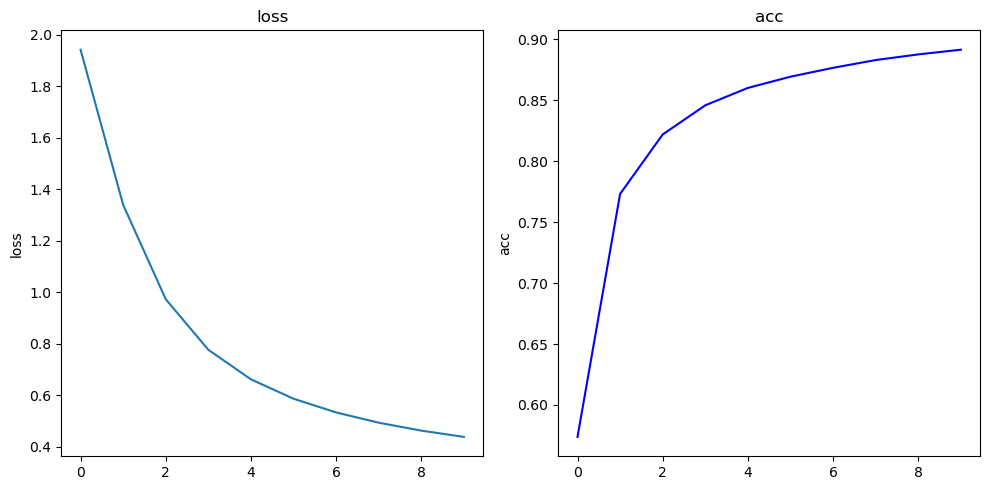

In [66]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.ylabel("loss")

plt.subplot(122)
plt.plot(hist.history['accuracy'], 'b-')
plt.title("acc")
plt.ylabel("acc")

plt.tight_layout()
plt.show()

- 위에 처럼 나오면 다시 학습을 하는 것을 추천한다.
- 수렴구간이 보여야 하기 때문

- epoch를 늘려봐라

##### 모델 검증

In [67]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.4100 - accuracy: 0.8986


[0.40995630621910095, 0.8985999822616577]

##### 후처리

In [68]:
test_x[:1].shape

(1, 784)

In [70]:
prediction_sample = model.predict(test_x[:1])
prediction_sample

1/1 [==============================] - 0s 90ms/step


array([[4.7218011e-04, 1.4655937e-03, 2.0217872e-03, 1.9672364e-02,
        2.6447389e-03, 2.1667031e-03, 9.9860488e-05, 9.4043779e-01,
        4.0081987e-04, 3.0618196e-02]], dtype=float32)

예측값은 0 ~ 9사이의 확률 값이다.

즉, 원핫인코딩 필요 ( 가장 확률 값이 큰 값으로 후처리를 해줘야 한다.)

In [71]:
np.argmax(prediction_sample)

7

In [72]:
sample_image = test_x[0].reshape((28, 28)) * 255 
#sample_image = test_x[0].reshape((28, 28))

In [74]:
test_y[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

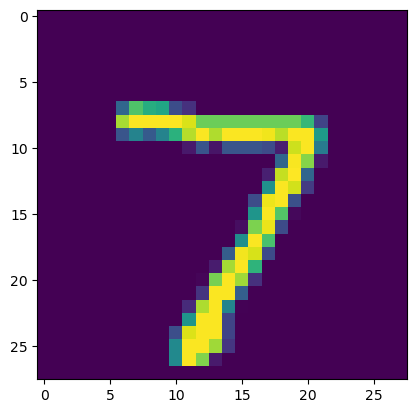

In [73]:
plt.imshow(sample_image)
plt.show()